# Modelos de clasificación aplicados a negociaciones y medias de desempeño de las estrategias

In [1]:
# Funciones numéricas adicionales 
import numpy as np 
# Lectura de datos y manejo de Data-sets 
import pandas as pd 
# Datos 
import yfinance as yfin 
# Gráficos  
import matplotlib.pyplot as plt 
# Análisis Técnico 
import ta 
# Funciones  
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
# Medidas de desempeño 
from sklearn.metrics import RocCurveDisplay 
# Support Vector Machine (SVM) / Support Vector Classification (SVC) 
from sklearn.svm import SVC 
# Random Forest Classifier 
from sklearn.ensemble import RandomForestClassifier 
# Redes Neuronales / Multi-layer Perceptron (MLP)  
from sklearn.neural_network import MLPClassifier

Descargamos los datos de la tasa de cambio USD/UYU (peso uruguayo) de yahoo finance desde el 2018-09-01 hasta el 2023-09-01. Utilizamos la librería ``ta`` para crear indicadores de media exponencial (EMA) de 5, 20, 50 y 100 días, y dividimos sobre el precio de cierre (Close). 

In [2]:
# Fechas a usar
start = '2018-09-01'
end = '2023-09-01'

# Descargamos datos de USD-UYU
df = yfin.download('UYU=X',start=start, end=end) 
df['EMA_5'] = ta.trend.ema_indicator(close=df["Close"], window=5, fillna=True)/df["Close"] 
df['EMA_20'] = ta.trend.ema_indicator(close=df["Close"], window=20, fillna=True)/df["Close"] 
df['EMA_50'] = ta.trend.ema_indicator(close=df["Close"], window=50, fillna=True)/df["Close"] 
df['EMA_100'] = ta.trend.ema_indicator(close=df["Close"], window=100, fillna=True)/df["Close"] 
df 

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,EMA_5,EMA_20,EMA_50,EMA_100
Date,,,,,,,,,,
2018-09-03,31.686001,32.119999,31.686001,31.930000,31.930000,0,1.000000,1.000000,1.000000,1.000000
2018-09-04,31.704000,32.130001,31.704000,32.119999,32.119999,0,0.996056,0.994648,0.994317,0.994202
2018-09-05,31.622999,32.360001,31.622999,32.130001,32.130001,0,0.997164,0.994878,0.994242,0.994013
2018-09-06,31.834000,32.360001,31.834000,32.360001,32.360001,0,0.993385,0.988968,0.987678,0.987207
2018-09-07,31.971001,32.770000,31.971001,32.360001,32.360001,0,0.995590,0.990018,0.988162,0.987460
...,...,...,...,...,...,...,...,...,...,...
2023-08-25,37.500404,37.500404,37.146690,37.290882,37.290882,0,1.001030,1.002798,1.005320,1.012443
2023-08-28,37.175583,37.175583,37.157803,37.187977,37.187977,0,1.002534,1.005042,1.007784,1.014942
2023-08-29,37.111629,37.144798,37.111629,37.157803,37.157803,0,1.002232,1.005300,1.008265,1.015454


1. ¿Cuál es el último valor de la media móvil exponencial de 100 días sobre el precio de cierre?

In [3]:
print(f'Resp: {df["EMA_100"][-1]:.3f}')

Resp: 1.014


Utiliza la librería ta para crear el indicador RSI, ATR y Wiiliams r.

In [4]:
# RSI
df['RSI'] = ta.momentum.rsi(close=df["Close"], fillna=True) 
# ATR
df['ATR'] = ta.volatility.average_true_range(high=df["High"], low=df["Low"], close=df["Close"], fillna=True) 
# WR
df['WR'] = ta.momentum.williams_r(high=df["High"], low=df["Low"], close=df["Close"], fillna=True) 
df 

,Open,High,Low,Close,Adj Close,Volume,EMA_5,EMA_20,EMA_50,EMA_100,RSI,ATR,WR
Date,,,,,,,,,,,,,
2018-09-03,31.686001,32.119999,31.686001,31.930000,31.930000,0,1.000000,1.000000,1.000000,1.000000,100.000000,0.000000,-43.778676
2018-09-04,31.704000,32.130001,31.704000,32.119999,32.119999,0,0.996056,0.994648,0.994317,0.994202,100.000000,0.000000,-2.252732
2018-09-05,31.622999,32.360001,31.622999,32.130001,32.130001,0,0.997164,0.994878,0.994242,0.994013,100.000000,0.000000,-31.207476
2018-09-06,31.834000,32.360001,31.834000,32.360001,32.360001,0,0.993385,0.988968,0.987678,0.987207,100.000000,0.000000,-0.000000
2018-09-07,31.971001,32.770000,31.971001,32.360001,32.360001,0,0.995590,0.990018,0.988162,0.987460,100.000000,0.000000,-35.745370
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-25,37.500404,37.500404,37.146690,37.290882,37.290882,0,1.001030,1.002798,1.005320,1.012443,47.645189,0.384768,-79.157550
2023-08-28,37.175583,37.175583,37.157803,37.187977,37.187977,0,1.002534,1.005042,1.007784,1.014942,45.680120,0.366790,-88.723948
2023-08-29,37.111629,37.144798,37.111629,37.157803,37.157803,0,1.002232,1.005300,1.008265,1.015454,45.092834,0.346044,-91.529042


2. ¿Cuál es el último valor del RSI? 

In [5]:
print(f'Resp: {df["RSI"][-1]:.3f}')

Resp: 45.989


Crea el target (1 si el precio de cierre (Close) sube el día siguiente, -1 si baja) y añádelo como columna a la base de datos. Elimine las primeras 29 filas de la base de datos para no tener información faltante y el último dato ya que no sabemos el target de este día.

In [7]:
# Crea el Target (1 si el precio sube el día siguiente, -1 si baja) 
target = np.where(np.array(df['Close'][1:]) > np.array(df['Close'][:-1]), 1, -1) 
# Elimina el último día para el que no tenemos info del precio el día siguiente. 
df.drop(df.tail(1).index, inplace=True) 
# Creamos la columna target 
df['Target'] = target 
# Elimina los primeros 29 días dónde los indicadores técnicos no tienen suficiente info 
df.drop(df.head(29).index, inplace=True) 

3. ¿Cuántos días tienen un target de 1? 

In [8]:
print(f"Resp 3: {df.Target[df.Target==1].count()}")

Resp 3: 610


Crea tus bases “X” y “y” donde X contiene todas las variables explicativas (todas menos el target) y y contiene la variable de respuesta (target). Utiliza la función train_test_split de la librería sklearn para dividir tu base de datos en entrenamiento (train) y prueba (test), donde el 30% de tus datos sean de prueba (test). Recuerda que la base de prueba tiene que contener datos posteriores a la de entrenamiento.

In [9]:
# Divida el conjunto de datos en una característica o un conjunto de datos independiente (X) 
# y un destino o conjunto de datos dependiente (Y) 
X = df.drop('Target',axis=1) 
Y = df.Target 
# Vuelva a dividir los datos, pero esta vez en 90% de entrenamiento y 10% de prueba. 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, shuffle=False) 

4. ¿Cuál es la dimensión de la base de datos de prueba? 

In [12]:
print(f'Resp: filas {X_train.shape[0]}, columnas {X_train.shape[1]}') 

Resp: filas 891, columnas 13


Estandariza tus bases de datos de entrenamiento y prueba que contienen las variables explicativas.

In [13]:
#Standardization 
ss = StandardScaler() 
X_train = ss.fit_transform(X_train) 
X_test = ss.fit_transform(X_test) 

5. ¿Cuál es la media de la base de datos de entrenamiento? 

In [14]:
print(f"Resp: {X_train.mean()}")

Resp: -2.8708797404448495e-16


Utilice una máquina de soporte vectorial de clasificación (SVC) con kernerl rbf y añada el parámetro random_state=1 para ajustar la base de entrenamiento y haga la predicción con la base de prueba.

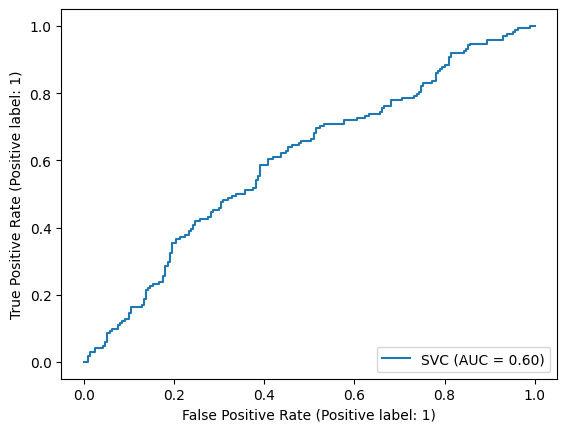

In [28]:
# Soporte vectorial de clasificación (SVC) con kernerl rbf
svc = SVC(kernel='rbf',random_state=1) 
# Entrenar el modelo de SVC
svc = svc.fit(X_train, Y_train) 
# Curva ROC
roc_svc = RocCurveDisplay.from_estimator(svc, X_test, Y_test) 

6. ¿Cuál es el valor del AUC? 

In [29]:
auc = roc_svc.roc_auc
print(f"Resp: {auc:.3f}")

Resp: 0.601


Utilice un random forest classifier (RandomForestClassifier) y añada el parámetro random_state=1 para ajustar la base de entrenamiento, haga la predicción con la base de prueba.

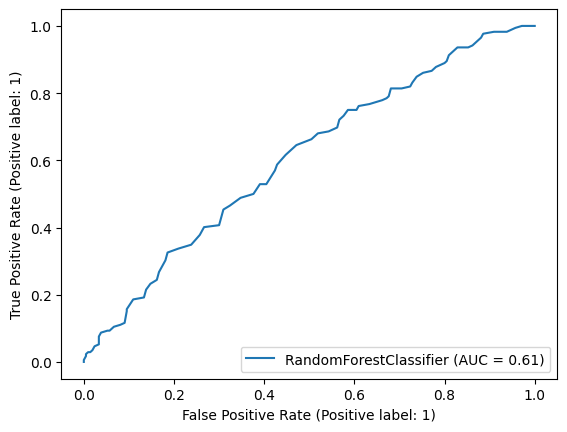

In [22]:
# Crear el modelo clasificador de Random Forest 
rfc = RandomForestClassifier(random_state=1) 
# Entrenar el modelo de Random Forest 
rfc = rfc.fit(X_train, Y_train) 
# Curva ROC 
roc_rfc = RocCurveDisplay.from_estimator(rfc, X_test, Y_test) 

7. ¿Cuál es el valor del AUC? 

In [24]:
auc = roc_rfc.roc_auc
print(f"Resp: {auc:.3f}")

Resp: 0.605


Utilice una red neuronal MLP de clasificación (MLPClassifier) con los siguientes parámetros: 

``solver='adam', hidden_layer_sizes=(32,16), max_iter=1000, random_state=1 ``

para ajustar la base de entrenamiento, haga la predicción con la base de prueba.

c:\Users\lasm1\OneDrive\Escritorio\DS\Finanzas\finanzas\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


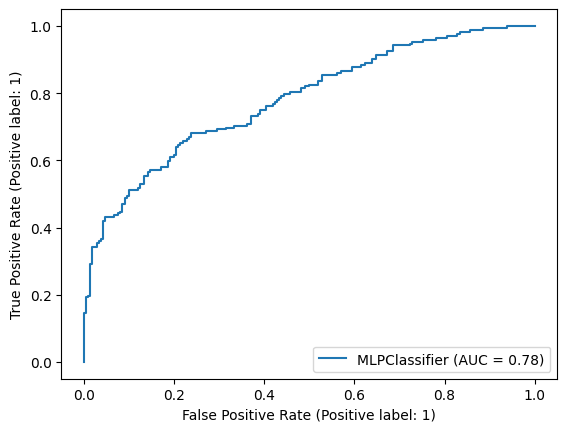

In [25]:
# Crear el modelo clasificador de Redes Neuronales 
mlp = MLPClassifier(solver='adam', hidden_layer_sizes=(32,16), max_iter=1000,random_state=1) 
# Entrenar el modelo de Redes Neuronales 
mlp = mlp.fit(X_train, Y_train) 
# Curva ROC
roc_mpl = RocCurveDisplay.from_estimator(mlp, X_test, Y_test) 

8. ¿Cuál es el valor del AUC? 

In [26]:
auc = roc_mpl.roc_auc
print(f"Resp: {auc:.3f}")

Resp: 0.780


9. Basado únicamente en el AUC, ¿qué modelo utilizaría? 

In [44]:
resultados = {'Soporte vectorial': roc_svc.roc_auc, 'Bosque Aleatorio': roc_rfc.roc_auc, 'Redes Neuronales':roc_mpl.roc_auc}
max_key, max_value = max(resultados.items(), key=lambda x: x[1])
print(f'El mejor modelo fue {max_key.upper()} con un valor auc de: {max_value:.3f}')

El mejor modelo fue REDES NEURONALES con un valor auc de: 0.780
